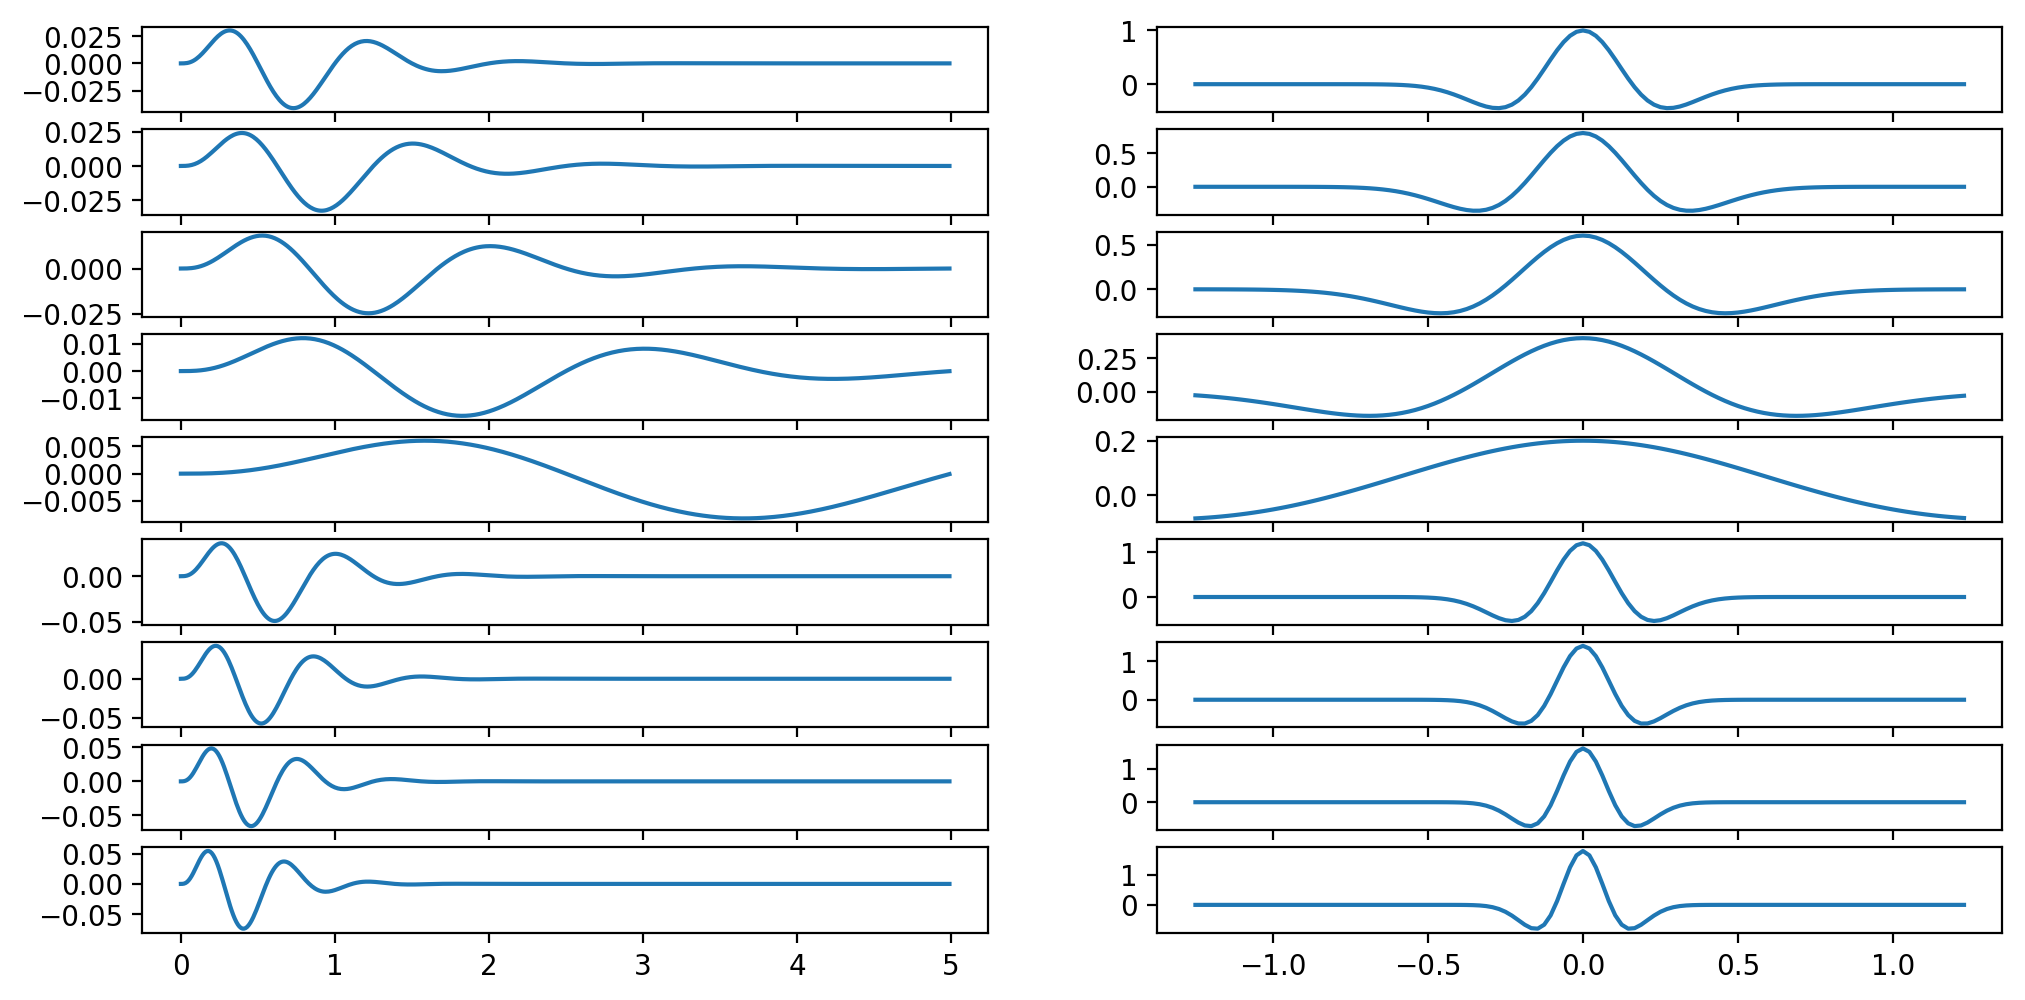

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from audlib.sig.spectemp import strf
from scipy.signal import correlate2d
from audlib.plot import specgram

frate = 100
bins_per_octave = 48
time_support = .2
freq_support = 1


# Visualize the time function and spectral function at different rates and scales
def hs(x, scale):
    sx = scale * x
    return scale * (1-(2*np.pi*sx)**2) * np.exp(-(2*np.pi*sx)**2/2)

def ht(t, rate):
    rt = rate * t
    return rate * rt**2 * np.exp(-3.5*rt) * np.sin(2*np.pi*rt)


fig = plt.figure(dpi=200, figsize=[12, 6])
gs = gridspec.GridSpec(9, 2, figure=fig)
tt = np.arange(0, 5 ,step=1/frate)
axt = fig.add_subplot(gs[0, 0])  # plot rate=1 for reference
axt.plot(tt, ht(tt, 1))
# Now plot different rates
for ii, rate in enumerate([.8, .6, .4, .2, 1.2, 1.4, 1.6, 1.8]):
    ax = fig.add_subplot(gs[ii+1, 0], sharex=axt)
    ax.plot(tt, ht(tt, rate))
ff = np.arange(-1.25, 1.25 ,step=1/bins_per_octave)
axf = fig.add_subplot(gs[0, 1])  # plot scale=1 for reference
axf.plot(ff, hs(ff, 1))
# Now plot different scales
for ii, scale in enumerate([.8, .6, .4, .2, 1.2, 1.4, 1.6, 1.8]):
    ax = fig.add_subplot(gs[ii+1, 1], sharex=axf)
    ax.plot(ff, hs(ff, scale))

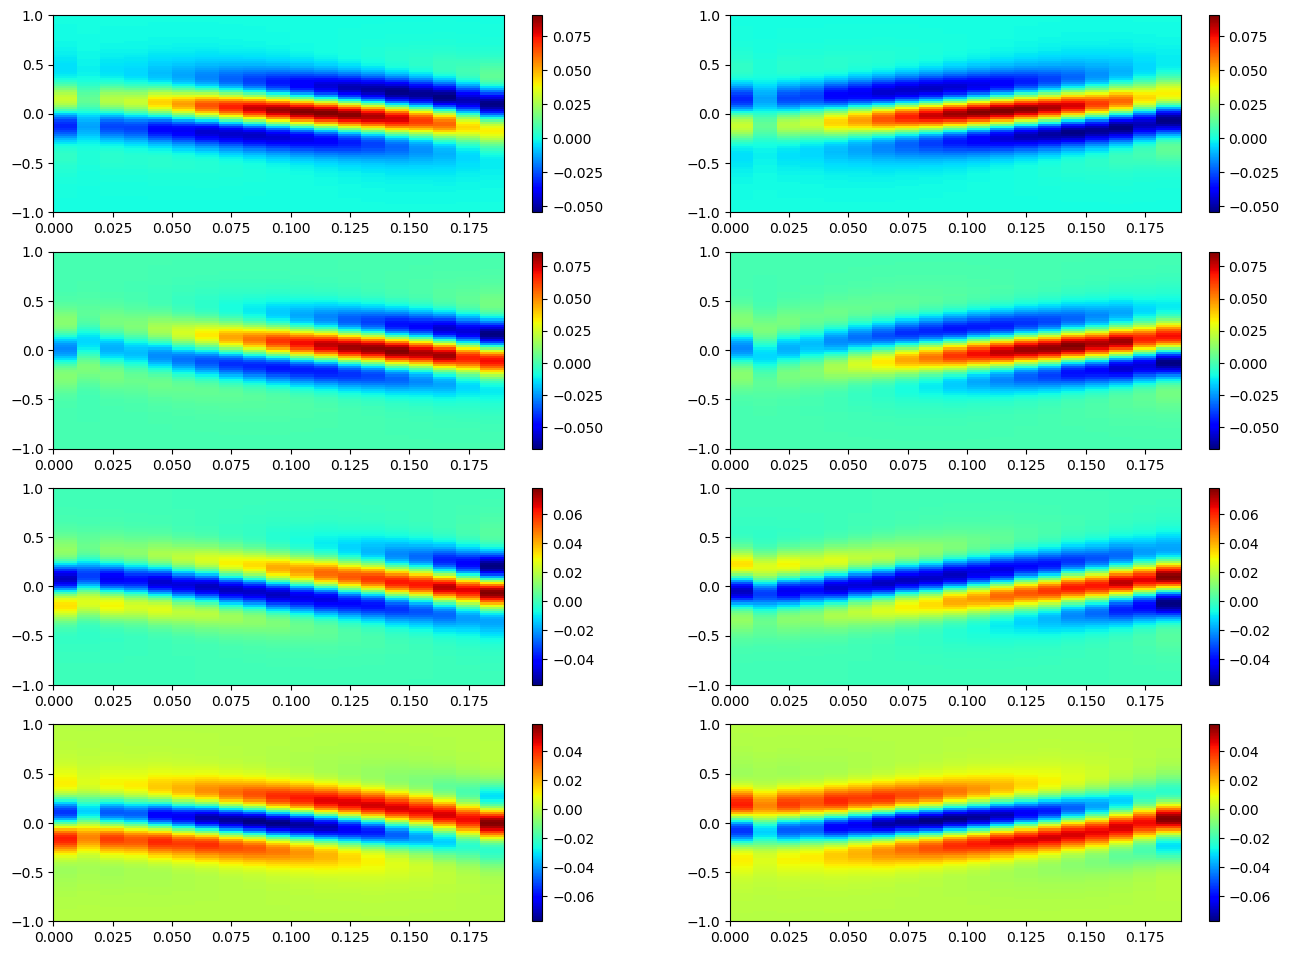

In [2]:
# Hold phi; sweep theta
fig = plt.figure(figsize=(16, 12), dpi= 100)
thetas = np.arange(0, 1, .25)
for ii, theta in enumerate(thetas):
    kdn, kup = strf(time_support, freq_support, frate, bins_per_octave, rate=3, scale=1, phi=0, theta=theta*np.pi)
    ax = fig.add_subplot(int(f'{len(thetas)}2{2*ii+1}'))
    specgram(kdn, ax, time_axis=np.arange(kdn.shape[0])*(1/frate),
            freq_axis=np.linspace(-freq_support, freq_support, num=kdn.shape[1]))
    ax = fig.add_subplot(int(f'{len(thetas)}2{2*ii+2}'))
    specgram(kup, ax, time_axis=np.arange(kdn.shape[0])*(1/frate),
            freq_axis=np.linspace(-freq_support, freq_support, num=kdn.shape[1]))


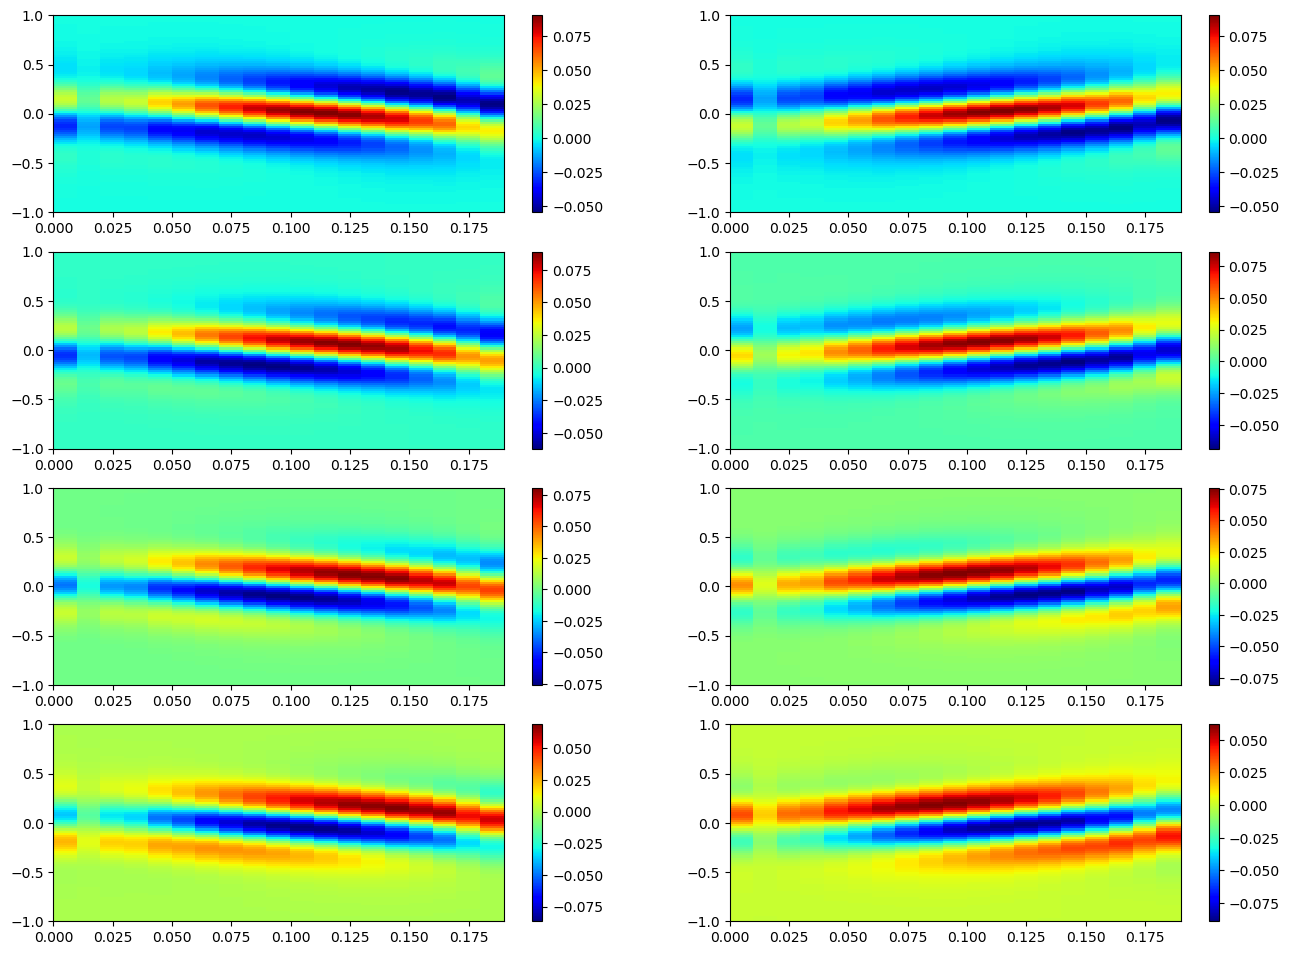

In [3]:
# Hold theta; sweep phi
fig = plt.figure(figsize=(16, 12), dpi= 100)
phis = np.arange(0, 1, .25)
for ii, phi in enumerate(phis):
    kdn, kup = strf(time_support, freq_support, frate, bins_per_octave, rate=3, scale=1, phi=phi*np.pi, theta=0)
    ax = fig.add_subplot(int(f'{len(thetas)}2{2*ii+1}'))
    specgram(kdn, ax, time_axis=np.arange(kdn.shape[0])*(1/frate),
            freq_axis=np.linspace(-freq_support, freq_support, num=kdn.shape[1]))
    ax = fig.add_subplot(int(f'{len(thetas)}2{2*ii+2}'))
    specgram(kup, ax, time_axis=np.arange(kdn.shape[0])*(1/frate),
            freq_axis=np.linspace(-freq_support, freq_support, num=kdn.shape[1]))

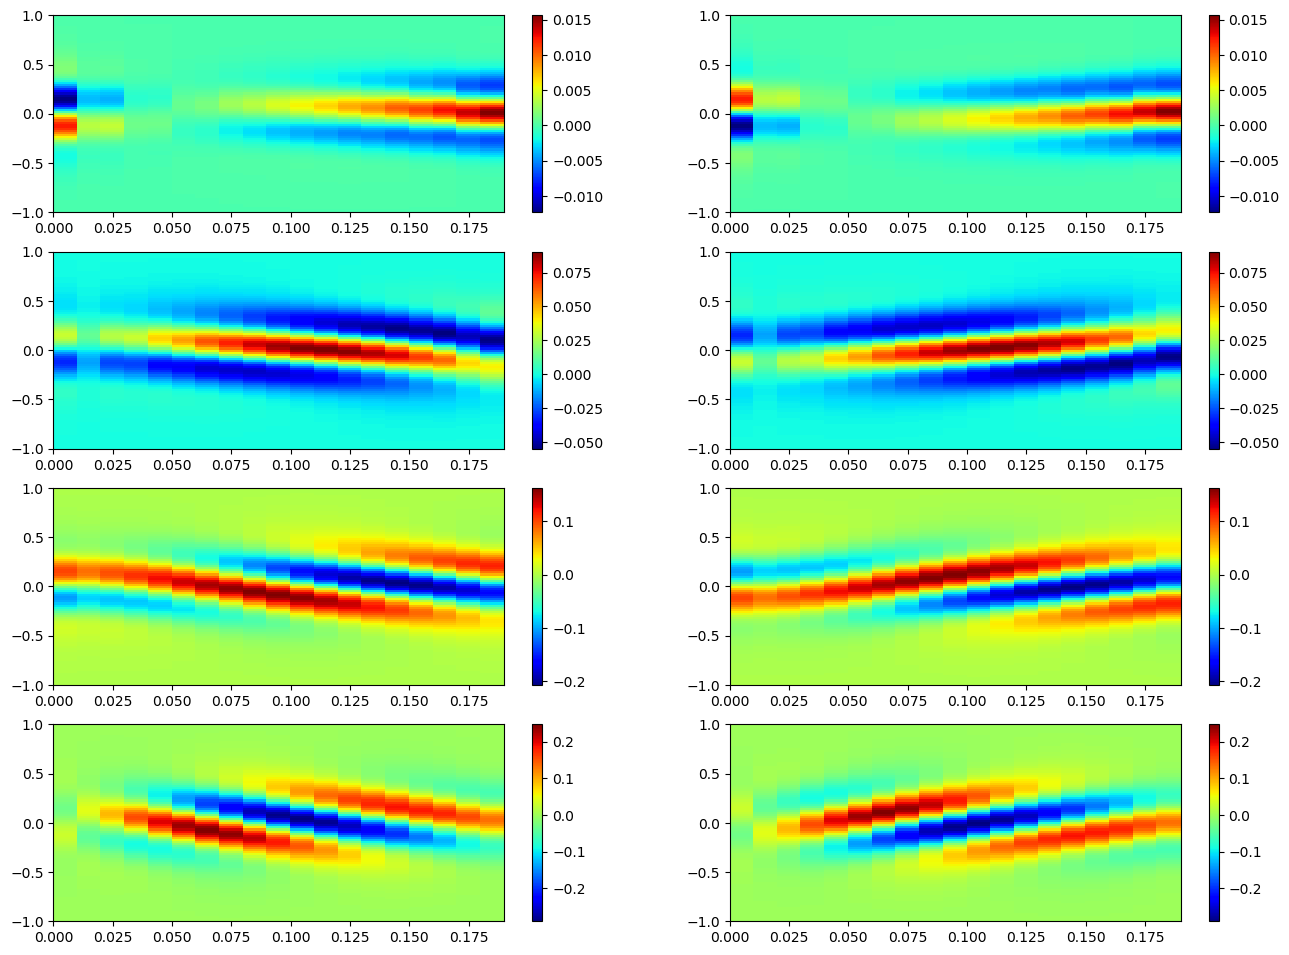

In [4]:
# Sweep rate
fig = plt.figure(figsize=(16, 12), dpi= 100)
rates = [1, 3, 5, 7]
for ii, rate in enumerate(rates):
    kdn, kup = strf(time_support, freq_support, frate, bins_per_octave, rate=rate, scale=1)
    ax = fig.add_subplot(int(f'{len(rates)}2{2*ii+1}'))
    specgram(kdn, ax, time_axis=np.arange(kdn.shape[0])*(1/frate),
            freq_axis=np.linspace(-freq_support, freq_support, num=kdn.shape[1]))
    ax = fig.add_subplot(int(f'{len(rates)}2{2*ii+2}'))
    specgram(kup, ax, time_axis=np.arange(kdn.shape[0])*(1/frate),
            freq_axis=np.linspace(-freq_support, freq_support, num=kdn.shape[1]))

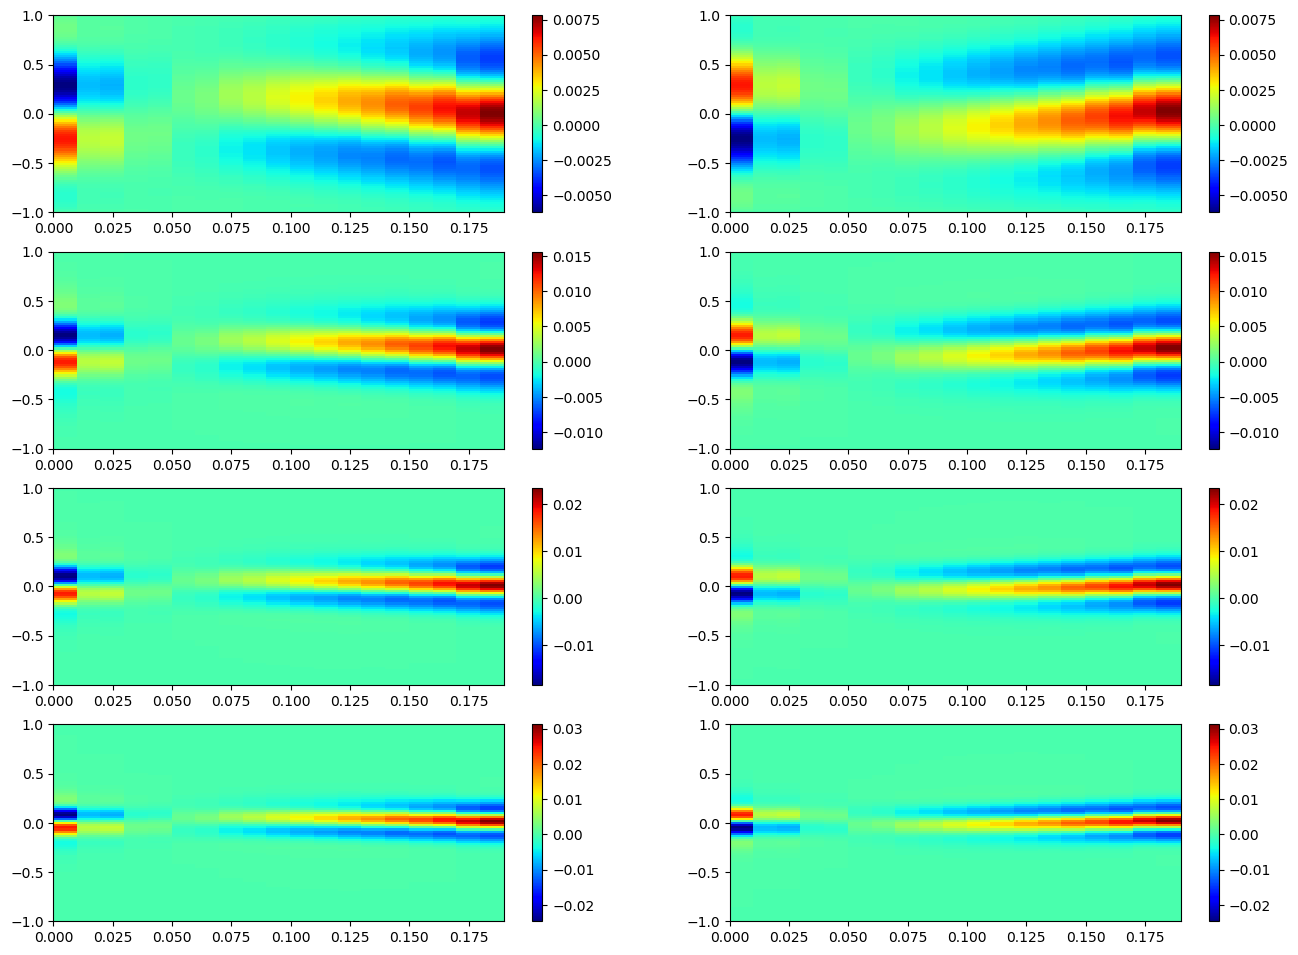

In [5]:
# Sweep scale
fig = plt.figure(figsize=(16, 12), dpi= 100)
scales = [.5, 1, 1.5, 2]
for ii, scale in enumerate(scales):
    kdn, kup = strf(time_support, freq_support, frate, bins_per_octave, rate=1, scale=scale)
    ax = fig.add_subplot(int(f'{len(scales)}2{2*ii+1}'))
    specgram(kdn, ax, time_axis=np.arange(kdn.shape[0])*(1/frate),
            freq_axis=np.linspace(-freq_support, freq_support, num=kdn.shape[1]))
    ax = fig.add_subplot(int(f'{len(scales)}2{2*ii+2}'))
    specgram(kup, ax, time_axis=np.arange(kdn.shape[0])*(1/frate),
            freq_axis=np.linspace(-freq_support, freq_support, num=kdn.shape[1]))